In [1]:
import pickle
import random
import os
import numpy as np
import tensorflow as tf
import numpy as np
import math
import pandas as pd 


epsilon = tf.keras.backend.epsilon()

#3qqmA 215


In [2]:
#
#   Corel converter
#

def corel_get_map(pdb, path, expected_l = -1):
    seqy = None
    
    #mypath="./data/deepcov/distance/2xc8A-cb.npy"
    mypath = path + pdb + '-cb.npy'
    print(mypath)
            # ly length of the sequence, seqy is the sequence chain, cb_map is the distance mapping between pairs shape is (ly*ly)
    (ly, seqy, cb_map) = np.load(mypath, allow_pickle = True)

    Y = cb_map
    print("############### Y #################")

    # Only CAMEO dataset has this issue
    if 'cameo' not in mypath:
        #if any value in Y is null then program stops
        assert not np.any(np.isnan(Y))
   #Cameo is in the path name then ignore
    if np.any(np.isnan(Y)):
        np.seterr(invalid='ignore')
        print('')
        print('WARNING!! Some values in the pdb structure of', pdb, 'l = ', ly, 'are missing or nan! Indices are: ', np.where(np.isnan(np.diagonal(Y))))
    Y[Y <= 8.0] = -1.0
    Y[Y>8]=0
    KK=Y

    for i in range (len(Y[0])):
        KK[i][i]=-(sum(Y[i])-Y[i][i])

    KK=KK.astype('float64')
    w , v = np.linalg.eig(KK)
    idx = w.argsort()
    w = w[idx]
    v = v[:,idx]

    u=np.zeros(shape=(len(v[1]), len(v[1])))
    for i in range (1,len(v)):

        u=u+(np.matmul(v[:,i][:,None],v[:,i][None,:]))/w[i]
    CC=u
    C=np.zeros(shape=np.shape(u))

    for i in range(len(CC[0])):
        for j in range(len(CC[0])):
            C[i][j]=CC[i][j]/np.sqrt(CC[i][i])/np.sqrt(CC[j][j])

   

    
  
    return C





./data/psicov/distance/1xffA-cb.npy
############### Y #################


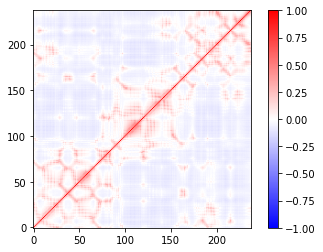

In [3]:
import matplotlib.pyplot as plt
import numpy as np
A=corel_get_map("1xffA","./data/psicov/distance/")
plt.imshow( A, cmap='bwr', origin='lower')

plt.clim(-1,1)

plt.colorbar()
#plt.figure(figsize=((100, 100)))
plt.savefig('1jogA.png',dpi=500)

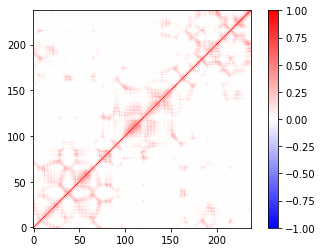

In [4]:

A[A<0]=0
plt.imshow( A, cmap='bwr', origin='lower')

plt.clim(-1,1)

plt.colorbar()
#plt.figure(figsize=((100, 100)))
plt.savefig('1jogA.png',dpi=500)

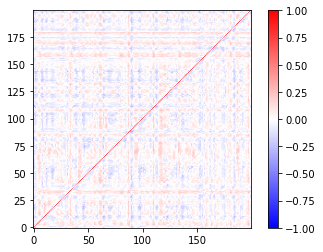

In [9]:
# need two functions first that uses get map corel other that prints
#the output using the prediction matrix get map corel is there however
# function for printing the matrix is not there



def predicted_map(directory, protein_number, precision_multiplier):
    
    path="/home/chemical/btech/ch1190960/scratch/BTP/pdnet-master"+directory+"matrix/P-cb.npy"
    D = np.load(path, allow_pickle = True)
    LMAX=512
    pad_size=10
    D[:, :LMAX-pad_size, :LMAX-pad_size, :] = D[:, int(pad_size/2) : LMAX-int(pad_size/2), int(pad_size/2) : LMAX-int(pad_size/2), :]
    
    
    
    B=D[protein_number,:,:,0]        
    B=B/precision_multiplier
    
    L=512
    for i in range(0 , 512):
        if B[i,i]==0:
            L=i
            print(i)
            break
    L=200
    A=B[:L,:L]
    plt.imshow( A , cmap='bwr', origin='lower')

    plt.clim(-1,1)

    plt.colorbar()
    plt.savefig('1jogA.png',dpi=500)
    

#a='/7_sem/COREL_R1_epoch_100000_500_predictions/'
a='/E_10_B_30_Multiplier_1_linear_alltanh_3000_predictions/'

#0to150
#138 is above protein
protein_number=138
precision_multiplier=1


predicted_map(a,protein_number,precision_multiplier)


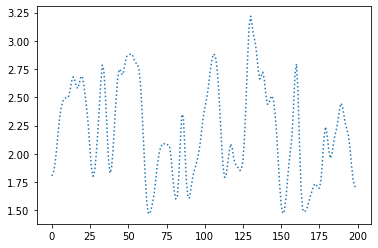

In [6]:
def predicted_diagonal(directory, protein_number, precision_multiplier):
    
    path="/home/chemical/btech/ch1190960/scratch/BTP/pdnet-master"+directory+"matrix/P-cb.npy"
    D = np.load(path, allow_pickle = True)
    LMAX=512
    pad_size=10
    D[:, :LMAX-pad_size, :LMAX-pad_size, :] = D[:, int(pad_size/2) : LMAX-int(pad_size/2), int(pad_size/2) : LMAX-int(pad_size/2), :]
    
    
    
    B=D[protein_number,:,:,0]        
    B=B/precision_multiplier
    
    
    
  

                
    L=200
    A=B[:L,:L]
    a= np.diag(A)
    ypoints = a

    plt.plot(ypoints, linestyle = 'dotted')
    plt.show()

    
    
#a='/7_sem/COREL_R1_epoch_100000_500_predictions/'
a='/COREL_1K_prc_zero_diagonal_linear_1000_predictions/'

#0to150
#138 is above protein
protein_number=138
precision_multiplier=1000


predicted_diagonal(a,protein_number,precision_multiplier)

In [6]:


def get_map_corel(pdb, all_dist_or_corel_paths, expected_l = -1):
    seqy = None
    mypath = ''
    for path in all_dist_or_corel_paths:
        if os.path.exists(path + pdb + '-cb.npy'):
            mypath = path + pdb + '-cb.npy'
            (ly, seqy, cb_map) = np.load(path + pdb + '-cb.npy', allow_pickle = True)
    if seqy == None:
        print('Expected distance map file for', pdb, 'not found at', all_dist_or_corel_paths)
        exit(1)
    if 'cameo' not in mypath and expected_l > 0:
        assert expected_l == ly
        assert cb_map.shape == ((expected_l, expected_l))
    Y = cb_map
    # Only CAMEO dataset has this issue
    if 'cameo' not in mypath:
        assert not np.any(np.isnan(Y))
    if np.any(np.isnan(Y)):
        np.seterr(invalid='ignore')
        print('')
        print('WARNING!! Some values in the pdb structure of', pdb, 'l = ', ly, 'are missing or nan! Indices are: ', np.where(np.isnan(np.diagonal(Y))))
        

    A=Y
    Y[Y <= 8.0] = -1.0
    Y[Y>8]=0
    KK=Y
    
    for i in range (len(Y[0])):
        KK[i][i]=-(sum(Y[i])-Y[i][i])

    KK=KK.astype('float64')
    w , v = np.linalg.eig(KK)
    idx = w.argsort()
    w = w[idx]
    v = v[:,idx]

    u=np.zeros(shape=(len(v[1]), len(v[1])))
    for i in range (1,len(v)):
        if w[i]<0:
            print(w[i])
        u=u+(np.matmul(v[:,i][:,None],v[:,i][None,:]))/w[i]
    
    CC=u
    C=np.zeros(shape=np.shape(u))
    
    for i in range(len(CC[0])):
        for j in range(len(CC[0])):
            C[i][j]=CC[i][j]/np.sqrt((CC[i][i]))/np.sqrt((CC[j][j]))
    

    return C

In [7]:
from tqdm import tqdm
def load_list(file_lst, max_items = 1000000):
    if max_items < 0:
        max_items = 1000000
    protein_list = []
    f = open(file_lst, 'r')
    for l in f.readlines():
        protein_list.append(l.strip().split()[0])
    if (max_items < len(protein_list)):
        protein_list = protein_list[:max_items]
    return protein_list

dir_dataset               = './data/' 
deepcov_list = load_list(dir_dataset + '/deepcov.lst')

all_dist_or_corel_paths = [dir_dataset + '/deepcov/distance/', dir_dataset + '/psicov/distance/']

for i, pdb in tqdm(enumerate(deepcov_list)):
        #print(pdb)
        Y = get_map_corel(pdb, all_dist_or_corel_paths)
        

88it [00:26,  3.33it/s]


KeyboardInterrupt: 

In [ ]:
from tqdm import tqdm

for i in tqdm(range(0,150)):
    for j in range(0,512):
        for k in range(0,512):
            if C[i,j,k] !=0:
                print(C[i,j,k])
    
        
        


In [5]:
import math
C=CC
for i in range(len(CC[0])):
    for j in range(len(CC[0])):
        C[i][j]=CC[i][j]/np.sqrt(CC[i][i]*CC[j][j])
        
print(B)

NameError: name 'CC' is not defined

In [12]:
a=np.array([1,2,3])
b=np.matmul(a[:,None],a[None,:])
print(b/3)




[[0.33333333 0.66666667 1.        ]
 [0.66666667 1.33333333 2.        ]
 [1.         2.         3.        ]]


In [ ]:
import pickle
import random
import os
import numpy as np
import tensorflow as tf
import numpy as np
import math
import pandas as pd 
import random
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,10):
    random_file=random.choice(os.listdir("/home/chemical/btech/ch1190960/scratch/BTP/pdnet-master/data/psicov/distance
    "))

    (ly, seqy, cb_map) = np.load(path + pdb + '-cb.npy', allow_pickle = True)

    Y= cb_map

    Y[Y>8]=0
    KK=Y

    for i in range (len(Y[0])):
        KK[i][i]=-(sum(Y[i])-Y[i][i])

    KK=KK.astype('float64')
    w , v = np.linalg.eig(KK)
    idx = w.argsort()
    w = w[idx]
    v = v[:,idx]

    u=np.zeros(shape=(len(v[1]), len(v[1])))
    for i in range (1,len(v)):

        u=u+(np.matmul(v[:,i][:,None],v[:,i][None,:]))/w[i]
    CC=u
    C=np.zeros(shape=np.shape(u))

    for i in range(len(CC[0])):
        for j in range(len(CC[0])):
            C[i][j]=CC[i][j]/np.sqrt(CC[i][i])/np.sqrt(CC[j][j])

    plt.imshow( A , cmap='bwr', origin='lower')

    plt.clim(-1,1)

    plt.colorbar()

